In [8]:
# Install required packages
# !pip install entsoe-py pandas matplotlib requests jupyter
# using uv .. 
# uv add install entsoe-py pandas matplotlib requests jupyter


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from entsoe import EntsoePandasClient
import warnings
warnings.filterwarnings('ignore')

# You need to get a free API token from ENTSO-E transparency platform
# Register at: https://transparency.entsoe.eu/
# Go to Account Settings > Web API Security Token
API_TOKEN = "xxxx"  # Replace with your actual token

# Initialize the client
client = EntsoePandasClient(api_key=API_TOKEN)


In [10]:
# SE4 is the bidding zone code for southern Sweden
# Other Swedish zones: SE1 (north), SE2 (central), SE3 (south-central), SE4 (south)
country_code = 'SE_4'  # Sweden zone 4

# Define date range for data retrieval
start_date = pd.Timestamp('2024-01-01', tz='Europe/Stockholm')
end_date = pd.Timestamp('2024-01-07', tz='Europe/Stockholm')  # One week of data

print(f"Fetching day-ahead prices for {country_code} from {start_date.date()} to {end_date.date()}")


Fetching day-ahead prices for SE_4 from 2024-01-01 to 2024-01-07


In [11]:
try:
    # Fetch day-ahead prices
    day_ahead_prices = client.query_day_ahead_prices(
        country_code=country_code,
        start=start_date,
        end=end_date
    )
    
    print(f"Successfully retrieved {len(day_ahead_prices)} data points")
    print(f"Date range: {day_ahead_prices.index.min()} to {day_ahead_prices.index.max()}")
    print(f"Price range: {day_ahead_prices.min():.2f} - {day_ahead_prices.max():.2f} EUR/MWh")
    
    # Display first few rows
    print("\nFirst 10 data points:")
    print(day_ahead_prices.head(10))
    
except Exception as e:
    print(f"Error fetching data: {e}")
    print("Make sure you have set your API token correctly and have internet connection")


Successfully retrieved 145 data points
Date range: 2024-01-01 00:00:00+01:00 to 2024-01-07 00:00:00+01:00
Price range: 21.23 - 526.25 EUR/MWh

First 10 data points:
2024-01-01 00:00:00+01:00    29.56
2024-01-01 01:00:00+01:00    28.46
2024-01-01 02:00:00+01:00    26.66
2024-01-01 03:00:00+01:00    24.48
2024-01-01 04:00:00+01:00    24.01
2024-01-01 05:00:00+01:00    21.23
2024-01-01 06:00:00+01:00    22.62
2024-01-01 07:00:00+01:00    25.04
2024-01-01 08:00:00+01:00    26.24
2024-01-01 09:00:00+01:00    32.21
Freq: 60min, dtype: float64


In [12]:
# Convert to DataFrame for easier analysis
if 'day_ahead_prices' in locals():
    df = pd.DataFrame({
        'timestamp': day_ahead_prices.index,
        'price_eur_mwh': day_ahead_prices.values
    })
    
    # Add additional time-based columns
    df['date'] = df['timestamp'].dt.date
    df['hour'] = df['timestamp'].dt.hour
    df['day_of_week'] = df['timestamp'].dt.day_name()
    
    print("DataFrame structure:")
    print(df.info())
    print("\nSample data:")
    print(df.head())
    
    # Basic statistics
    print(f"\nPrice Statistics:")
    print(f"Mean price: {df['price_eur_mwh'].mean():.2f} EUR/MWh")
    print(f"Median price: {df['price_eur_mwh'].median():.2f} EUR/MWh")
    print(f"Standard deviation: {df['price_eur_mwh'].std():.2f} EUR/MWh")


DataFrame structure:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype                           
---  ------         --------------  -----                           
 0   timestamp      145 non-null    datetime64[ns, Europe/Stockholm]
 1   price_eur_mwh  145 non-null    float64                         
 2   date           145 non-null    object                          
 3   hour           145 non-null    int32                           
 4   day_of_week    145 non-null    object                          
dtypes: datetime64[ns, Europe/Stockholm](1), float64(1), int32(1), object(2)
memory usage: 5.2+ KB
None

Sample data:
                  timestamp  price_eur_mwh        date  hour day_of_week
0 2024-01-01 00:00:00+01:00          29.56  2024-01-01     0      Monday
1 2024-01-01 01:00:00+01:00          28.46  2024-01-01     1      Monday
2 2024-01-01 02:00:00+01:00          26.66  2024-01-01 

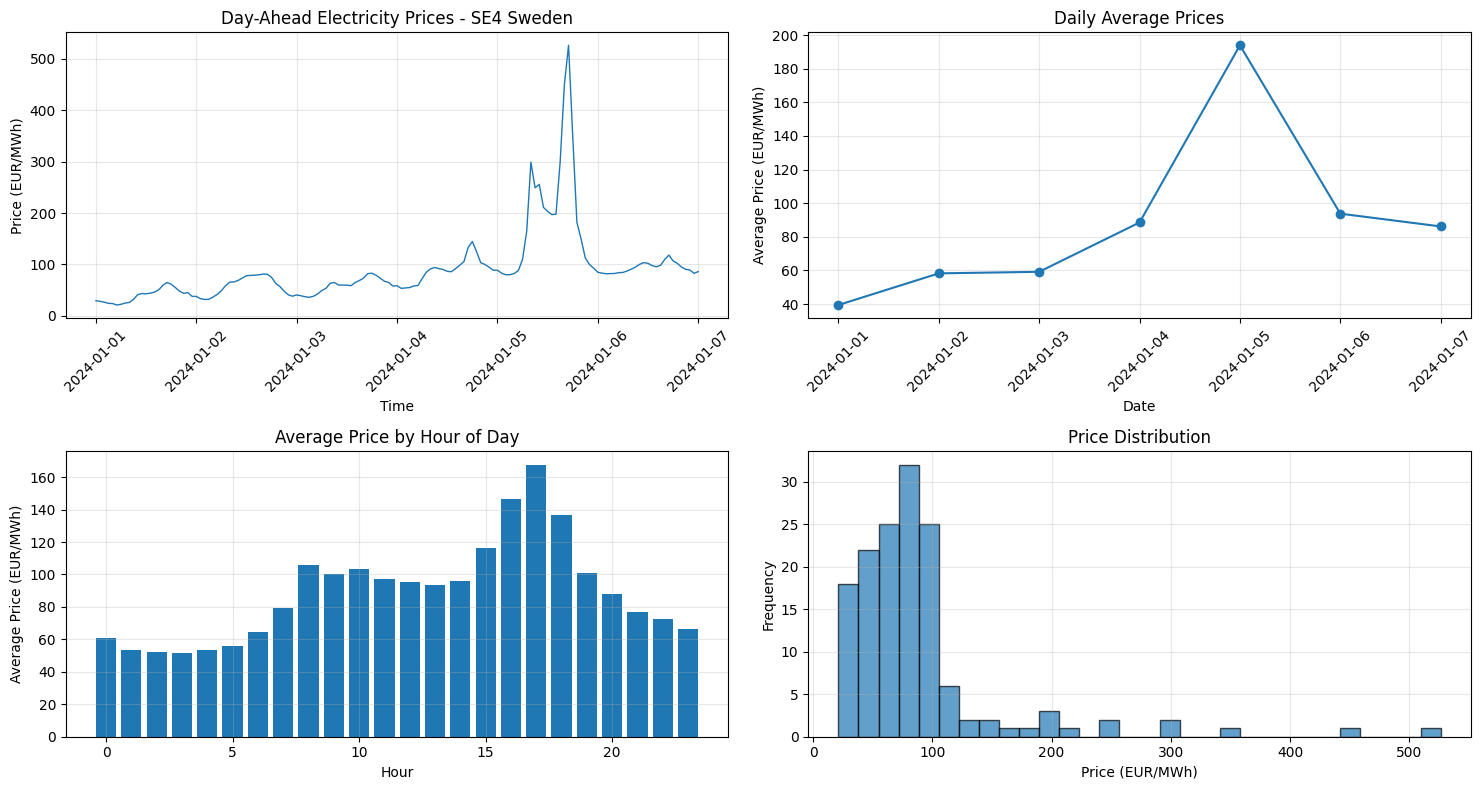

In [13]:
# Plot the pricing data
if 'day_ahead_prices' in locals():
    plt.figure(figsize=(15, 8))
    
    # Time series plot
    plt.subplot(2, 2, 1)
    plt.plot(day_ahead_prices.index, day_ahead_prices.values, linewidth=1)
    plt.title(f'Day-Ahead Electricity Prices - SE4 Sweden')
    plt.xlabel('Time')
    plt.ylabel('Price (EUR/MWh)')
    plt.xticks(rotation=45)
    plt.grid(True, alpha=0.3)
    
    # Daily average prices
    plt.subplot(2, 2, 2)
    daily_avg = df.groupby('date')['price_eur_mwh'].mean()
    plt.plot(daily_avg.index, daily_avg.values, marker='o')
    plt.title('Daily Average Prices')
    plt.xlabel('Date')
    plt.ylabel('Average Price (EUR/MWh)')
    plt.xticks(rotation=45)
    plt.grid(True, alpha=0.3)
    
    # Hourly pattern
    plt.subplot(2, 2, 3)
    hourly_avg = df.groupby('hour')['price_eur_mwh'].mean()
    plt.bar(hourly_avg.index, hourly_avg.values)
    plt.title('Average Price by Hour of Day')
    plt.xlabel('Hour')
    plt.ylabel('Average Price (EUR/MWh)')
    plt.grid(True, alpha=0.3)
    
    # Price distribution
    plt.subplot(2, 2, 4)
    plt.hist(df['price_eur_mwh'], bins=30, alpha=0.7, edgecolor='black')
    plt.title('Price Distribution')
    plt.xlabel('Price (EUR/MWh)')
    plt.ylabel('Frequency')
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()


In [7]:
# Save data to CSV for further analysis
if 'df' in locals():
    filename = f"se4_day_ahead_prices_{start_date.strftime('%Y%m%d')}_{end_date.strftime('%Y%m%d')}.csv"
    df.to_csv(filename, index=False)
    print(f"Data saved to {filename}")
    
    # Show sample of saved data
    print(f"\nSaved {len(df)} records to CSV file")
    print("Sample of saved data:")
    print(df[['timestamp', 'price_eur_mwh', 'date', 'hour']].head())
